PART 1
Generation of random points in space

In [1]:
#libraries

import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import math
import scipy
from scipy.stats import norm

In [2]:
#number of atoms
num = 500

In [3]:
#constants and paramerers

g_ = 3/2
mu_B = 9.2740100783e-24
h_bar = 1.055e-34
gamma = 0.08
# det = (-2*22/7)*(110e3)

In [4]:
#atom positions

dim = 5e-3 #dimeter

x_lst = (np.random.uniform(low=-1, high=1, size=(num,)))*(dim/2)
y_lst = (np.random.uniform(low=-1, high=1, size=(num,)))*(dim/2)
z_lst = (np.random.uniform(low=-1, high=1, size=(num,)))*(dim/2)

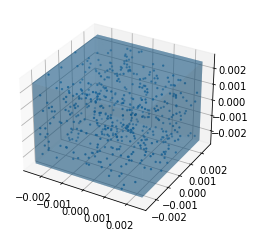

In [5]:
#Cube graph

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_cube():   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)

    x = np.cos(Phi)*np.sin(Theta)
    y = np.sin(Phi)*np.sin(Theta)
    z = np.cos(Theta)/np.sqrt(2)
    return x,y,z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_lst, y_lst, z_lst, s=2);

a = dim
b = dim
c = dim
x,y,z = get_cube()


ax.plot_surface(x*a, y*b, z*c, alpha=0.2)


plt.show()

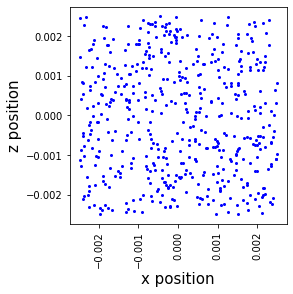

In [6]:
#2D plot

plt.scatter(x_lst, z_lst, s=4, c='b')
ax = plt.gca()
plt.xlabel('x position', fontsize=15)
plt.ylabel('z position', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_aspect(1)
plt.show()


PART 2
Generation of random initial velocities

In [7]:
#Maxwell distribution

pi = 22/7
M = 133*1.67e-27
T = 300
k = 1.38e-23

#standard deviation
sigma = np.sqrt((k*T)/M)

In [8]:
#Maxwell distribution

from scipy.stats import maxwell

u = maxwell.rvs(loc=0, scale=sigma, size=num)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


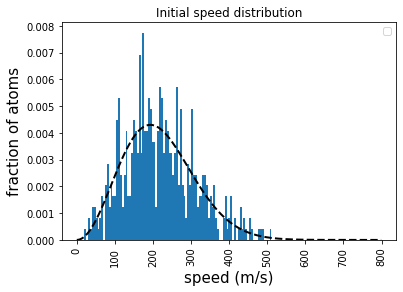

In [9]:
def MB_speed(x,m,T):
    """ Maxwell-Boltzmann speed distribution for speeds """
    kB = 1.38e-23
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * x**2 * np.exp(-m*x**2/(2*kB*T))

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.arange(0,800,1)
amu = 1.66e-27

fx = MB_speed(x,M,T)
ax.plot(x,fx, 'k--',lw=2)

ax.legend(loc=0)
# ax.set_xlabel('$v$ (m/s)')
# ax.set_ylabel('PDF, $f_v(v)$')



count, bins, ignored = plt.hist(u, 100, density=True, label='histogram')

plt.title('Initial speed distribution')
plt.xlabel('speed (m/s)', fontsize=15)
plt.ylabel('fraction of atoms', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Initial speed distribution", dpi=1000)

plt.draw()

In [10]:
#unit vector and velocity

theta = np.pi*np.random.rand(num)
phi = 2*np.pi*np.random.rand(num)

ux = u*np.sin(theta)*np.cos(phi)
uy = u*np.sin(theta)*np.sin(phi)
uz = u*np.cos(theta)

PART 3
Evolution of the system

In [11]:
#parameters
# 
h_bar=1.055e-34
M=133*(1.67e-27)
g = 9.8
Kwave=(2*22)/(7*852e-9)
del_t = 0.1/(2*pi*5.332e6)
mom = (h_bar*Kwave/M)
print(mom)

0.003504284754344203


In [12]:
Gamma = 2*pi*5.332e6
W1 = 1.0
W2 = 1.0
S = 100
# A = 0.00008
A = 0.1

Kwave=(2*22)/(7*852e-9)

det = (-2*22/7)*(4e3)
# det = Gamma

omega = 1*A*g_*mu_B*gamma/h_bar

In [35]:
#simulation time

time_itt = 10000


#Total time
time_tot = del_t*time_itt
print(time_tot)

2.983700470572189e-05


In [36]:
#simulation start
x_pos, x_sp = [x_lst], [ux]
y_pos, y_sp = [y_lst], [uy]
z_pos, z_sp = [z_lst], [uz]

In [37]:
from numpy import random
import numpy as np

In [38]:
for i in range(time_itt):
    dum_spx, dum_posx, dum_spy, dum_posy, dum_spz, dum_posz = [], [], [], [], [], []

    
    for j in range(num):
        
        
        p1 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det - Kwave*x_sp[i][j] - omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        p2 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det + Kwave*x_sp[i][j] + omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)

        dum_spx.append(x_sp[i][j] + mom*(p1 - p2))
        dum_posx.append(x_pos[i][j] + x_sp[i][j]*del_t + mom*(p1 - p2)*del_t)
        
        
       
          
          
            
        p3 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det - Kwave*y_sp[i][j] - omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        p4 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det + Kwave*y_sp[i][j] + omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)    

        dum_spy.append(y_sp[i][j] + mom*(p3 - p4))
        dum_posy.append(y_pos[i][j] + y_sp[i][j]*del_t + mom*(p3 - p4)*del_t)


        
        
                        

        p5 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det - Kwave*z_sp[i][j] - omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        p6 = (Gamma*W1*S/2)/(1 + W1*S + (4/Gamma**2)*(det + Kwave*z_sp[i][j] + omega*np.sqrt((np.array(x_pos[i][j]))**2 + (np.array(y_pos[i][j]))**2 + (2*(np.array(z_pos[i][j])))**2))**2)
        dum_spz.append(z_sp[i][j] + mom*(p5 - p6) + g*del_t)
        dum_posz.append(z_pos[i][j] + z_sp[i][j]*del_t + mom*(p5 - p6)*del_t + 0.5*g*del_t**2)            
            

    
    
    
    x_sp.append(dum_spx)
    x_pos.append(dum_posx)
    y_sp.append(dum_spy)
    y_pos.append(dum_posy)
    z_sp.append(dum_spz)
    z_pos.append(dum_posz)       




#Simulation end

In [39]:
# #Results

# plt.scatter(x_lst, z_lst, s=4, c="b",)
# plt.scatter(x_pos[-1], z_pos[-1], s=2, c='r', alpha=0.5)
# ax = plt.gca()
# # plt.xlim([-5e-3, 5e-3])
# # plt.ylim([-5e-3, 5e-3])

# # plt.plot(5e-3*np.cos(np.linspace(0, 2*np.pi, 100)) , (5e-3)*np.sin(np.linspace(0, 2*np.pi, 100)), linestyle='--')
# ax.set_aspect(1)
# plt.title('Initial position(blue) vs Final position(red) XZ')
# plt.xlabel('x position', fontsize=15)
# plt.ylabel('z position', fontsize=15)
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)
# plt.savefig("Initial position(blue) vs Final position(red) XZ", dpi=1000)
# plt.show()

In [40]:
speeds = []

for i in range(num):
    speeds.append(np.sqrt((x_sp[-1][i])**2 + (y_sp[-1][i])**2 + (z_sp[-1][i])**2))
        
# print(speeds)

In [41]:
in_speeds = []

for i in range(num):
    in_speeds.append(np.sqrt((x_sp[0][i])**2 + (y_sp[0][i])**2 + (z_sp[0][i])**2))
        
# print(speeds)

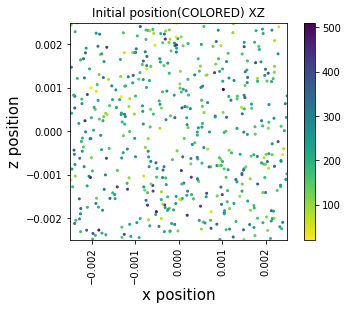

In [42]:
#Results

plt.scatter(x_lst, z_lst, s=4, c=in_speeds, cmap='viridis_r', alpha=1)

plt.colorbar()
ax = plt.gca()
plt.xlim([-0.0025, 0.0025])
plt.ylim([-0.0025, 0.0025])

ax.set_aspect(1)
plt.title('Initial position(COLORED) XZ')
plt.xlabel('x position', fontsize=15)
plt.ylabel('z position', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Initial position(COLORED) XZ 2", dpi=1000)
plt.show()

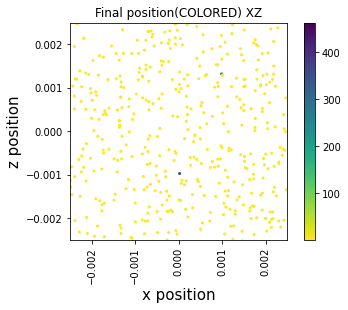

In [43]:
#Results

# plt.scatter(x_lst, z_lst, s=4, c="b",)
# plt.scatter(x_pos[-1], z_pos[-1], s=2, c='r', alpha=0.5)
plt.scatter(x_pos[-1], z_pos[-1], s=4, c=speeds, cmap='viridis_r', alpha=1)
plt.colorbar()
ax = plt.gca()
plt.xlim([-0.0025, 0.0025])
plt.ylim([-0.0025, 0.0025])

# plt.plot(5e-3*np.cos(np.linspace(0, 2*np.pi, 100)) , (5e-3)*np.sin(np.linspace(0, 2*np.pi, 100)), linestyle='--')
ax.set_aspect(1)
plt.title('Final position(COLORED) XZ')
plt.xlabel('x position', fontsize=15)
plt.ylabel('z position', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Final position(COLORED) XZ 2", dpi=1000)
plt.show()

In [44]:
#UPDATES


lim = 1e-3
cap = 0

for i in range(num):
    if (x_pos[-1][i])**2 <= lim and (y_pos[-1][i])**2 <= lim and (z_pos[-1][i])**2 <= lim:
        cap = cap + 1


capture_ratio = cap/num
       
print("The capture percentage is", capture_ratio*100, "%")

The capture percentage is 100.0 %


In [45]:
#Final speed

v = [0]*num
for q in range(num):
    v[q] = np.sqrt((x_sp[-1][q])**2 + (y_sp[-1][q])**2 + (z_sp[-1][q])**2)

In [46]:

r = [0]*num

for w in range(num):
    r[w] = np.sqrt((np.array(x_pos[-1][w]))**2 + (np.array(y_pos[-1][w]))**2 + (np.array(z_pos[-1][w]))**2)

In [47]:
print(min(v))
print(min(r))

print(v.index(min(v)))
print(r.index(min(r)))

0.14415574239518542
0.0003724931949609998
19
168


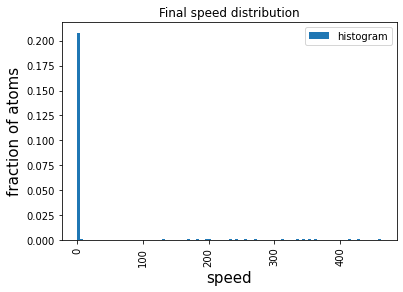

In [48]:
count, bins, ignored = plt.hist(v, 100, density=True, label='histogram')
plt.legend(loc='upper right')
plt.xlim
plt.title('Final speed distribution')
plt.xlabel('speed', fontsize=15)
plt.ylabel('fraction of atoms', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("Final speed distribution", dpi=1000)

plt.show()


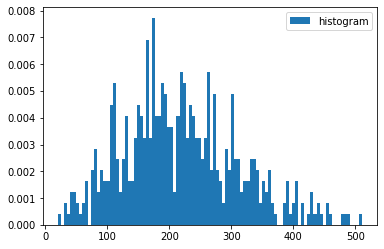

In [49]:
# Compare with the graph 
count, bins, ignored = plt.hist(u, 100, density=True, label='histogram')
plt.legend(loc='upper right')

plt.show()




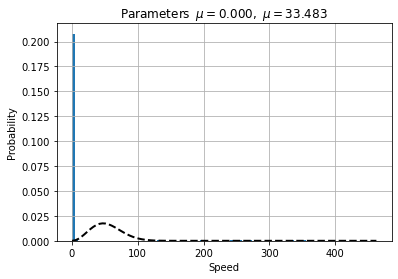

In [50]:
#CURVE

from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import maxwell

# read data from a text file. One number per line

datos = v

# best fit of data
(mu, sigma_) = maxwell.fit(datos, floc=0)

# the histogram of the data
n, bins, patches = plt.hist(datos, 100, density=True, facecolor='tab:blue', alpha=1)

# add a 'best fit' line
y = maxwell.pdf( bins, mu, sigma_)
l = plt.plot(bins, y, 'k--', linewidth=2)

#plot
plt.xlabel('Speed')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Parameters\:}\ \mu=%.3f,\ \mu=%.3f$' %(mu, sigma_))
plt.grid(True)
plt.savefig("Curve fitting", dpi=1000)
plt.show()

In [51]:
avg = np.mean(v)
var = np.var(v)
sd = np.sqrt(var)

print([avg, var, sd])

[11.397095780426133, 3233.480693757428, 56.86370277916685]


In [52]:
#CAPTURE RATIO


lim = 1e-6
cap = 0

for i in range(num):
    if (x_pos[-1][i])**2 <= lim and (y_pos[-1][i])**2 <= lim and (z_pos[-1][i])**2 <= lim:
        cap = cap + 1


capture_ratio = cap/num
       
print("The capture percentage is", capture_ratio*100, "%")

The capture percentage is 4.3999999999999995 %


In [53]:
#SPEED OF CAPTURED

speed_lst = []

for i in range(num):
    if (x_pos[-1][i])**2 <= lim and (y_pos[-1][i])**2 <= lim and (z_pos[-1][i])**2 <= lim:
        speed_lst.append(np.sqrt((x_sp[-1][i])**2 + (y_sp[-1][i])**2 + (z_sp[-1][i])**2))
        
print(speed_lst)

[0.43636864171814377, 0.14415574239518542, 0.48879224607439276, 0.4324608703497974, 0.3151513879789018, 0.4139627945369114, 0.3133075153239486, 0.46950628936008626, 0.170434015025867, 0.4564931012143333, 0.25937361699514816, 0.2886543357523703, 0.3329093360580581, 0.2309500997616342, 0.30885242454838047, 0.29404052612735476, 0.3976925454816802, 0.4030302556260284, 0.46155025021642637, 0.4377681622497573, 0.36443417025559954, 0.19204152013133488]


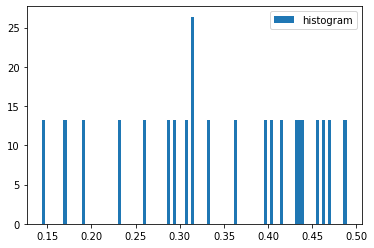

In [54]:
# Compare with the graph 
count, bins, ignored = plt.hist(speed_lst, 100, density=True, label='histogram')
plt.legend(loc='upper right')

plt.show()



In [55]:
np.mean(speed_lst)

0.34599681123551546

In [56]:
print(min(speed_lst))
print(np.mean(speed_lst))


print(min(v))


0.14415574239518542
0.34599681123551546
0.14415574239518542


In [73]:
#ONLY LOW SPEED
sp_lim = 0.2

new_speed_lst = []

for i in range(num):
    if np.sqrt((x_sp[-1][i])**2 + (y_sp[-1][i])**2 + (z_sp[-1][i])**2) <= sp_lim :
        new_speed_lst.append(np.sqrt((x_sp[-1][i])**2 + (y_sp[-1][i])**2 + (z_sp[-1][i])**2))
        
print(len(new_speed_lst))
print(new_speed_lst)

3
[0.14415574239518542, 0.170434015025867, 0.19204152013133488]


In [74]:
print(np.mean(new_speed_lst))

0.16887709251746244


In [75]:
v_m = np.mean(new_speed_lst)

T_ = (pi*133*v_m**2)/(8*8.314)

print(T_)

0.17923291216095374


In [86]:
G = 6.02e6
h = 1.055e-34
k = (2*pi)/852e-9
d = 15e-3
M = 0.133/6.022e23
sig = 3e-16
v_mp = 237

N = (G*G*h*h*k*k*d*d*d*d)/(sig*M*M*v_mp*v_mp*v_mp*v_mp)
print(N)

24074462.692560475


In [91]:
rho = (1e14)
v_c = 50


R = (rho*d*d*v_c**4)/(v_mp*v_mp*v_mp)

print(R)

10563734985.129642


In [93]:
F = rho*sig*267

print(F)

8.01


In [94]:
Neq = R/F

print(Neq)

1318818350.203451
